In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2598 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1150 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0595 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0195 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

In [7]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0779 - accuracy: 0.9796 - 1s/epoch - 4ms/step


In [8]:
# Print the test accuracy
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9796000123023987


In [9]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


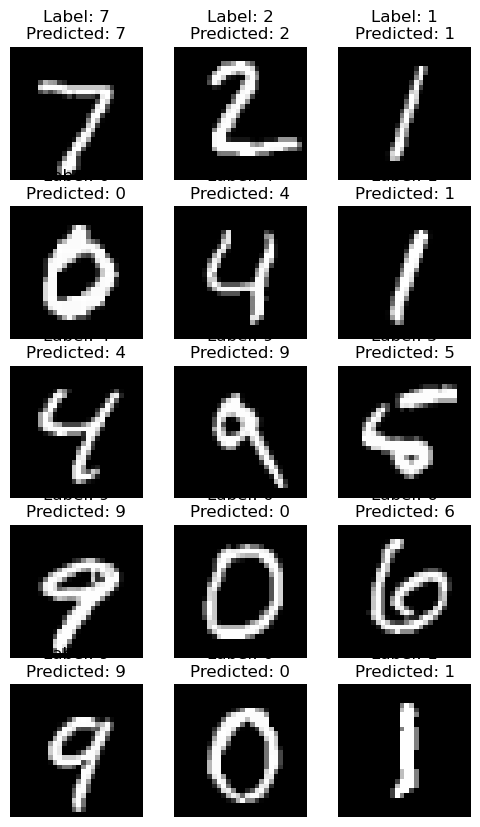

In [10]:
# Plot a sample of the test images with their predicted labels
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(test_labels[i], np.argmax(predictions[i])))
    plt.axis('off')
plt.show()